# Import Package và dữ liệu

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
data = pd.read_csv('/content/train.csv')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import time
import math
from datetime import datetime

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4822 entries, 0 to 4821
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         4822 non-null   int64  
 1   Order ID       4822 non-null   object 
 2   Order Date     4822 non-null   object 
 3   Ship Date      4822 non-null   object 
 4   Ship Mode      4822 non-null   object 
 5   Customer ID    4822 non-null   object 
 6   Customer Name  4822 non-null   object 
 7   Segment        4822 non-null   object 
 8   Country        4822 non-null   object 
 9   City           4822 non-null   object 
 10  State          4822 non-null   object 
 11  Postal Code    4821 non-null   float64
 12  Region         4822 non-null   object 
 13  Product ID     4822 non-null   object 
 14  Category       4822 non-null   object 
 15  Sub-Category   4822 non-null   object 
 16  Product Name   4822 non-null   object 
 17  Sales          4822 non-null   float64
dtypes: float

In [ ]:
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


# Assignment

### Vẽ biểu đồ thể hiện biến động doanh số theo tháng. Cho biết doanh thu trung bình trong 3 tháng gần nhất.

#### Tiền xử lý dữ liệu

In [ ]:
# Tạo cột mới "Tháng order" và "Tháng ship"
data['Order Date'] = pd.to_datetime(data['Order Date'], format="%d/%m/%Y")
data['Order Month'] = pd.DatetimeIndex(data['Order Date']).month
data['Order Year'] = pd.DatetimeIndex(data['Order Date']).year
data['Order Period'] = data['Order Date'].dt.to_period('M')

data['Ship Date'] = pd.to_datetime(data['Ship Date'], format="%d/%m/%Y")
data['Ship Month'] = pd.DatetimeIndex(data['Ship Date']).month
data['Ship Year'] = pd.DatetimeIndex(data['Ship Date']).year
data['Ship Period'] = data['Ship Date'].dt.to_period('M')

In [ ]:
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Category,Sub-Category,Product Name,Sales,Order Month,Order Year,Order Period,Ship Month,Ship Year,Ship Period
0,1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,11,2017,2017-11,11,2017,2017-11
1,2,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,11,2017,2017-11,11,2017,2017-11
2,3,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,6,2017,2017-06,6,2017,2017-06
3,4,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,10,2016,2016-10,10,2016,2016-10
4,5,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,10,2016,2016-10,10,2016,2016-10


In [ ]:
df_sales_by_months = data.groupby(['Order Period'])['Sales'].sum()
df_sales_last_3_months = data.groupby(['Order Period'])['Sales'].sum().tail(3)

#### Biểu độ biến động doanh số theo tháng

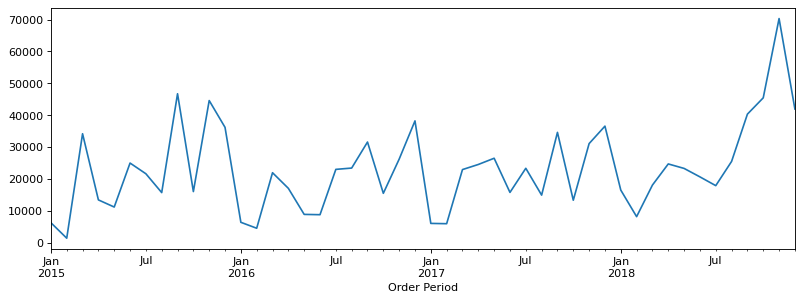

In [ ]:
plt.figure(num=None, figsize=(12, 4), dpi=80, facecolor='w', edgecolor='k')
(df_sales_by_months).plot()
plt.show()

#### Doanh thu 3 tháng gần nhất

In [ ]:
df_sales_last_3_months

Order Period
2018-10    45443.9060
2018-11    70340.2298
2018-12    41924.3918
Freq: M, Name: Sales, dtype: float64

### Vẽ biểu đồ doanh số bán hàng theo quý và cho biết quý nào có tổng doanh số cao nhất?

#### Tiền xử lý dữ liệu

In [ ]:
# Tạo cột mới "Quý order" và "Quý ship"
data['Order Quarter'] = data['Order Date'].dt.to_period('Q')
data['Ship Quarter'] = data['Ship Date'].dt.to_period('Q')

In [ ]:
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Product Name,Sales,Order Month,Order Year,Order Period,Ship Month,Ship Year,Ship Period,Order Quarter,Ship Quarter
0,1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Bush Somerset Collection Bookcase,261.9600,11,2017,2017-11,11,2017,2017-11,2017Q4,2017Q4
1,2,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,11,2017,2017-11,11,2017,2017-11,2017Q4,2017Q4
2,3,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,Self-Adhesive Address Labels for Typewriters b...,14.6200,6,2017,2017-06,6,2017,2017-06,2017Q2,2017Q2
3,4,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Bretford CR4500 Series Slim Rectangular Table,957.5775,10,2016,2016-10,10,2016,2016-10,2016Q4,2016Q4
4,5,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Eldon Fold 'N Roll Cart System,22.3680,10,2016,2016-10,10,2016,2016-10,2016Q4,2016Q4


In [ ]:
df = data.groupby(['Order Quarter'])['Sales'].sum().reset_index(name='Sales')

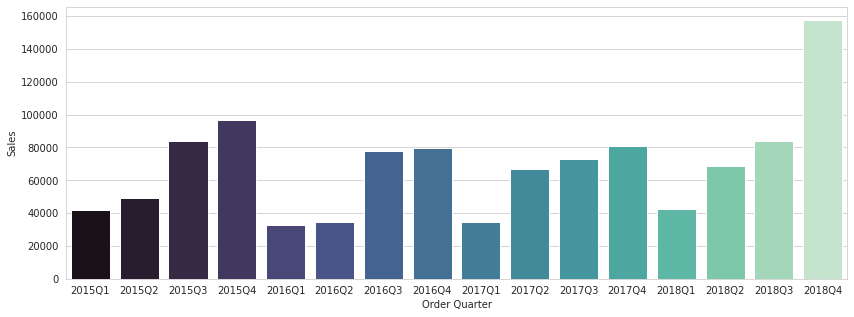

In [ ]:
import seaborn as sns
sns.set_style('whitegrid')
sns.axes_style(style='ticks')
fig, (ax1) = plt.subplots(1,1, figsize=(14,5))

sns.barplot(x = 'Order Quarter', y='Sales', data=df, 
            palette='mako', ax=ax1)

#plt.xticks(rotation=90)
plt.show()



> => Quý 4 năm 2018 có tổng doanh thu cao nhất



### Tính thời gian trung giao hàng trung bình (ship date - order date) theo từng tháng và vẽ biểu đồ mô tả sự biến thiên của con số này.

#### Tiền xử lý dữ liệu

In [ ]:
df = data.copy()
df['Shipping Days'] = (df['Ship Date'] - df['Order Date']).dt.days
df = df.groupby(['Order Period'])['Shipping Days'].mean()
#df = df.groupby(['Order Period'])['Shipping Days'].mean().reset_index(name='Shipping Days')
df

Order Period
2015-01    4.210526
2015-02    4.125000
2015-03    4.533333
2015-04    4.138462
2015-05    3.803279
2015-06    4.191489
2015-07    4.060606
2015-08    3.917808
2015-09    4.283582
2015-10    3.166667
2015-11    4.344156
2015-12    3.630137
2016-01    4.826087
2016-02    3.771429
2016-03    3.843750
2016-04    4.177215
2016-05    3.983607
2016-06    4.104478
2016-07    3.663265
2016-08    3.851351
2016-09    3.992537
2016-10    3.357143
2016-11    4.158940
2016-12    3.882682
2017-01    4.000000
2017-02    2.763158
2017-03    3.662791
2017-04    4.340000
2017-05    3.909091
2017-06    3.620000
2017-07    3.990000
2017-08    4.298851
2017-09    3.788462
2017-10    4.241758
2017-11    4.000000
2017-12    4.129252
2018-01    4.300000
2018-02    3.906977
2018-03    3.927835
2018-04    3.971429
2018-05    3.886598
2018-06    4.071429
2018-07    4.242424
2018-08    3.582524
2018-09    3.758794
2018-10    4.012500
2018-11    3.772532
2018-12    3.850220
Freq: M, Name: Shipping Day

#### Vẽ biểu đồ

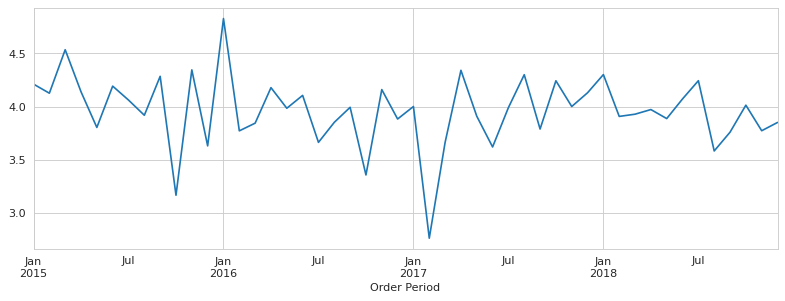

In [ ]:
plt.figure(num=None, figsize=(12, 4), dpi=80, facecolor='w', edgecolor='k')
(df).plot()
plt.show()

### Vẽ biểu đồ thể hiện sức mua theo từng thành phố. Cho biết top 3 thành phố có doanh số thấp nhất và 3 thành phố có doanh số cao nhất.

#### Tiền xử lý dữ liệu

In [ ]:
df = data.copy()
df = df.groupby(['City'])['Sales'].sum().reset_index(name='Sales').sort_values(by=['Sales'])
df

,City,Sales
100,Edinburg,2.3680
279,Ormond Beach,2.8080
32,Boca Raton,4.6080
193,Layton,4.9600
216,Marietta,5.6400
...,...,...
355,Seattle,45763.5240
293,Philadelphia,51944.1030
346,San Francisco,64360.2780
204,Los Angeles,83017.9045


#### Vẽ biểu đồ

In [ ]:
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots

fig = px.pie(df, values='Sales', names='City', 
            color_discrete_sequence=px.colors.sequential.RdBu,
            width = 750, height=450)
fig.update_traces(textposition='inside')
fig.update_layout(uniformtext_minsize=12, uniformtext_mode='hide')
fig.show()

> => Các thành phố có doanh thu cao nhất: New York City, Los Angeles, Seattle
> => Các thành phố có doanh thu thấp nhất: Abilene, Elyria, Jupiter

### Vẽ biểu đồ thể hiện tỉ trọng doanh số theo bang (state) và cho biết trung bình doanh số của 5 bang dẫn đầu về sức mua.

#### Tiền xử lý dữ liệu

In [ ]:
df = data.copy()
df = df.groupby(['State'])['Sales'].sum().reset_index(name='Sales').sort_values(by=['Sales'])
df

,State,Sales
43,Vermont,205.0300
17,Maine,653.4100
25,Nebraska,663.1100
32,North Dakota,891.5300
14,Kansas,1062.8700
39,South Dakota,1137.4200
10,Idaho,1321.8240
27,New Hampshire,1687.0400
13,Iowa,2697.7000
29,New Mexico,2824.7940


#### Vẽ biểu đồ 

In [ ]:
fig = px.pie(df, values='Sales', names='State', 
            color_discrete_sequence=px.colors.sequential.RdBu,
            width = 750, height=450)
fig.update_traces(textposition='inside')
fig.update_layout(uniformtext_minsize=12, uniformtext_mode='hide')
fig.show()

#### Trung bình doanh số 5 bang đứng đầu

In [ ]:
top_5 = df.tail(5)
top_5['Sales'].mean()

111632.32853999999

### Cho biết các bang dẫn đầu doanh số theo từng vùng (east, west, south, central,..).

In [ ]:
df = data.copy()
df = df.groupby(['Region', 'State'])['Sales'].sum().reset_index(name='Sales') \
        .sort_values(by=['Sales'], ascending=False).groupby('Region').first() \
        .reset_index()
df

,Region,State,Sales
0,Central,Texas,85205.8792
1,East,New York,144524.5340
2,South,Florida,57691.3810
3,West,California,214547.7265


### Cho biết top 3 sản phẩm có doanh thu cao nhất và top 3 sản phẩm có số lượng đơn vị bán ra cao nhất.

In [ ]:
df = data.copy()
df = df.groupby(['Product ID'])['Sales'].sum().reset_index(name='Sales') \
        .sort_values(by=['Sales'], ascending=False)
df.head(3)

,Product ID,Sales
1517,TEC-MA-10002412,22638.480
1499,TEC-CO-10004722,21699.938
1506,TEC-MA-10000822,16829.901


In [ ]:
df = data.copy()
df = df.groupby(['Product ID'])['Product ID'].count().reset_index(name='Count') \
        .sort_values(by=['Count'], ascending=False)
df.head(3)

,Product ID,Count
1457,TEC-AC-10003628,11
1060,OFF-PA-10001970,10
1316,OFF-ST-10004804,10


### Vẽ biểu đồ thể hiện tỉ trọng doanh số của từng category.

#### Tiền xử lý dữ liệu

In [ ]:
df = data.copy()
df = df.groupby(['Category'])['Sales'].sum().reset_index(name='Sales')
df

,Category,Sales
0,Furniture,342208.3097
1,Office Supplies,341240.1420
2,Technology,421602.4010


#### Vẽ biểu đồ

In [ ]:
            color_discrete_sequence=px.colors.sequential.RdBu,
            width = 750, height=450)
fig.update_traces(textposition='inside')
fig.update_layout(uniformtext_minsize=12, uniformtext_mode='hide')
fig.show()